<a href="https://colab.research.google.com/github/asb20/Pilot-Plant-Data-Parsing/blob/master/SupportVectorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [10]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

print(x)   #printing values before feature scaling
print(y)

y = y.reshape(len(y),1)   #reshaping y as a 2D array (standard scaler expects a 2D array)

print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()     #since x and y data are very different, two different standard scaler objects need to be created
scy = StandardScaler()

x = scx.fit_transform(x)    
y = scy.fit_transform(y)

print(x)   #feature scaled x values

print(y)    #feature scaled y values

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [43]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')  # we are using the radial basis function kernel for non linear predictions in this SVR
regressor.fit(x,y)    #SVR model trained on the data set

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [44]:
regressor.predict(scx.transform([[6.5]]))   #transform of x = 6.5 will be done to scale it and scaled y prediction will be made

print(regressor.predict(scx.transform([[6.5]])))  #prints the prediction corresponding to x = 6.5 in its scaled form


scy.inverse_transform(regressor.predict(scx.transform([[6.5]])))   #inversing the prediction according to

print(scy.inverse_transform(regressor.predict(scx.transform([[6.5]]))))


[0.01150915]
[0.01150915]


## Visualising the SVR results

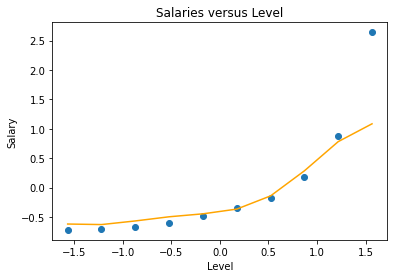

In [60]:
plt.scatter(scx.inverse_transform([[x]]),scy.inverse_transform([[y]]))   #while plotting, we have to inverse transform x and y to get back original values
plt.plot(scx.inverse_transform(x),scy.inverse_transform(regressor.predict(x)), color = 'orange')
plt.title('Salaries versus Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()